# Well log analysis: SPWLA 2020 Petrophysical Data-Driven Analytics Contest

In 2020, [SWPLA](https://www.spwla.org/) (Society of Petrophysicists and Well Log Analysts) organized a contest to test the ability of machine-learning algorithms to analyze well-log information.

![](https://frontier-cf252.com/wp-content/uploads/oandg-large.jpg)

https://frontier-cf252.com/industries/well-logging/

## Background information

https://github.com/pddasig/Machine-Learning-Competition-2020

Well logs are interpreted/processed to estimate the in-situ petrophysical and geomechanical properties, which is essential for subsurface characterization. Various types of logs exist, and each provides distinct information about subsurface properties. Certain well logs, such as gamma ray (GR), resistivity, density, and neutron logs, are considered as “easy-to-acquire” conventional well logs that are run in most of the wells. Other well logs, such as nuclear magnetic resonance, dielectric dispersion, elemental spectroscopy, and sometimes sonic logs, are only run in limited number of wells.

![](http://www.ingenieriadepetroleo.com/wp-content/uploads/2013/01/Sonic-log.-a-Schematic-compensated-sonic-logging-sonde.-b-Sonic-log..jpg)


[Sonic travel-time logs](https://wiki.seg.org/wiki/Dictionary:Sonic_log) contain critical geomechanical information for subsurface characterization around the wellbore. Often, sonic logs are required to complete the well-seismic tie workflow or geomechanical properties prediction. When sonic logs are absent in a well or an interval, a common practice is synthesizing them based on neighboring wells with sonic logs. This procedure is known as sonic log synthesis or pseudo sonic log generation.

## Download data

In [ ]:
!pip install wget

  Preparing metadata (setup.py) ... done
  Created wheel for wget: filename=wget-3.2-py3-none-any.whl size=9655 sha256=3d42e90b9a5ef69dcd5e13a8f4485c555eb1403ffddb038252cfd5c4d5e75790
  Stored in directory: /root/.cache/pip/wheels/8b/f1/7f/5c94f0a7a505ca1c81cd1d9208ae2064675d97582078e6c769
Successfully built wget


In [ ]:
import wget

#download data
url = 'https://github.com/pddasig/Machine-Learning-Competition-2020/raw/master/Data3_1_2020.zip'
wget.download(url)

'Data3_1_2020.zip'

In [ ]:
# Extract training data

import zipfile
with zipfile.ZipFile('Data3_1_2020.zip', 'r') as zipf:
    zipf.extract('train.csv')

The data is in the form of a CSV (comma-separated values) file. Different rows correspond to different depth levels in the borehole, and columns correspond to different logs.

We will use [pandas](https://pandas.pydata.org/), a Python data analysis library, for managing data.

![](https://upload.wikimedia.org/wikipedia/commons/thumb/e/ed/Pandas_logo.svg/512px-Pandas_logo.svg.png)

In [ ]:
import pandas as pd

In [ ]:
# load data from CSV file

logs = pd.read_csv('train.csv')
logs.head()

,CAL,CNC,GR,HRD,HRM,PE,ZDEN,DTC,DTS
0,-999.0,-999.0,41.4699,-999.0,-999.0,-999.0,-999.0,128.0737,319.0654
1,-999.0,-999.0,42.5053,-999.0,-999.0,-999.0,-999.0,127.8347,318.7825
2,-999.0,-999.0,43.1548,-999.0,-999.0,-999.0,-999.0,127.2307,317.3323
3,-999.0,-999.0,43.2410,-999.0,-999.0,-999.0,-999.0,126.2917,313.6486
4,-999.0,-999.0,40.3218,-999.0,-999.0,-999.0,-999.0,125.3985,307.8903


In [ ]:
# data information
logs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30143 entries, 0 to 30142
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   CAL     30143 non-null  float64
 1   CNC     30143 non-null  float64
 2   GR      30143 non-null  float64
 3   HRD     30143 non-null  float64
 4   HRM     30143 non-null  float64
 5   PE      30143 non-null  float64
 6   ZDEN    30143 non-null  float64
 7   DTC     30143 non-null  float64
 8   DTS     30143 non-null  float64
dtypes: float64(9)
memory usage: 2.1 MB


In [ ]:
# data attributes
logs.describe()

,CAL,CNC,GR,HRD,HRM,PE,ZDEN,DTC,DTS
count,30143.000000,30143.000000,30143.000000,30143.000000,30143.000000,30143.000000,30143.000000,30143.000000,30143.000000
mean,-8.394576,-23.692615,38.959845,3.977690,1.547299,-17.446739,-20.229982,-54.891703,-9.737567
std,129.970219,157.142679,108.504554,365.112753,456.908969,149.083136,148.809506,372.858812,440.314119
min,-999.000000,-999.000000,-999.000000,-999.000000,-999.000000,-999.000000,-999.000000,-999.000000,-999.000000
25%,8.058350,0.122800,17.248750,0.717700,0.712050,0.053100,2.226700,66.304350,118.534350
50%,8.625000,0.193600,36.821800,1.623000,1.628100,4.941500,2.432200,78.355100,137.689300
75%,9.048850,0.337150,58.346150,3.158300,3.280600,7.856650,2.551350,107.022500,182.973150
max,21.064200,3490.158200,1470.253400,10000.000000,60467.761700,28.106400,3.259700,155.980300,487.438400


## Meaning of different columns

| Key | Description | Unit |
|-----|-------------|------|
| **CAL** | Caliper log | inch |
| **CNC** | Neutron log  | dec  |
| **GR**  | Gamma Ray log | API |
| **HRD** | Deep Resistivity log | Ohm per meter |
| **HRM** | Medium Resistivity log  | Ohm per meter |
| **PE**  | Photo-Electric Factor log | Barn |
| **ZDEN**| Density log | grams per cubic meter |
| **DTC** | Compressional Travel-time log | nanosecond per foot |
| **DTS** | Shear Travel-time log | nanosecond per foot |

Values set to -999 mark missing values.

The goal is to predict sonic logs (DTS and DTS) from other logs.

## Attempt to predict sonic from density

We will start by selecting only two logs (ZDEN and DTC) and attempt to predict one from the other using a simple linear regression. The attempt may fail, but it will illustrate the general setup of the problem.

First, we will drop missing or anomalous values and examine the data distribution.

In [ ]:
import numpy as np

# select two logs
two = logs.loc[:, ('ZDEN', 'DTC')]
# replace -999 with NaN
two.replace(-999, np.nan, inplace=True)
# drop rows with NaN
two.dropna(inplace=True)
# data information
two.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 25516 entries, 573 to 30142
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   ZDEN    25516 non-null  float64
 1   DTC     25516 non-null  float64
dtypes: float64(2)
memory usage: 598.0 KB


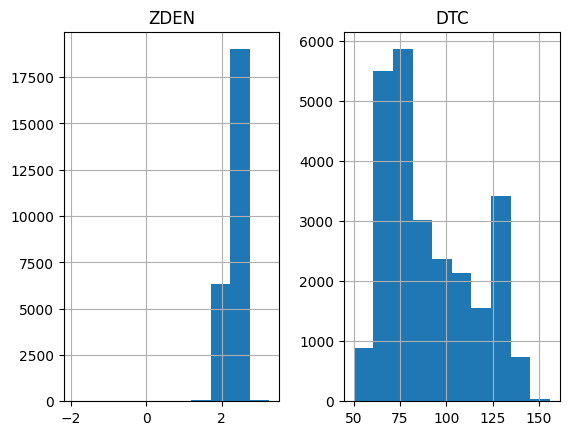

In [ ]:
# display histogram
hist = two.hist()

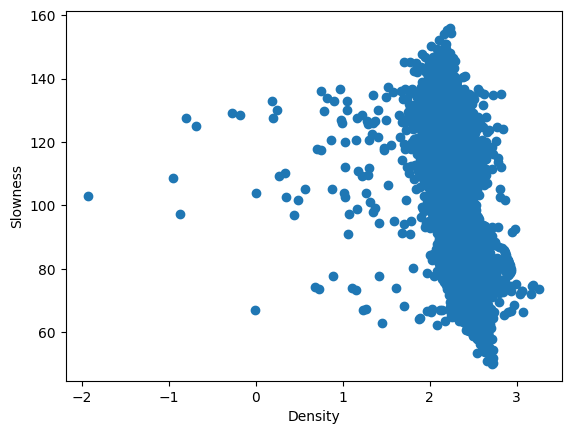

In [ ]:
# display scatter plot

import matplotlib.pyplot as plt
plt.scatter(two.ZDEN, two.DTC)
plt.xlabel('Density')
plt.ylabel('Slowness')
plt.show()

In [ ]:
# remove anomalous density values
two2 = two.loc[(two.ZDEN > 1.5) & (two.ZDEN < 3.1)]
two2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 25442 entries, 573 to 30142
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   ZDEN    25442 non-null  float64
 1   DTC     25442 non-null  float64
dtypes: float64(2)
memory usage: 596.3 KB


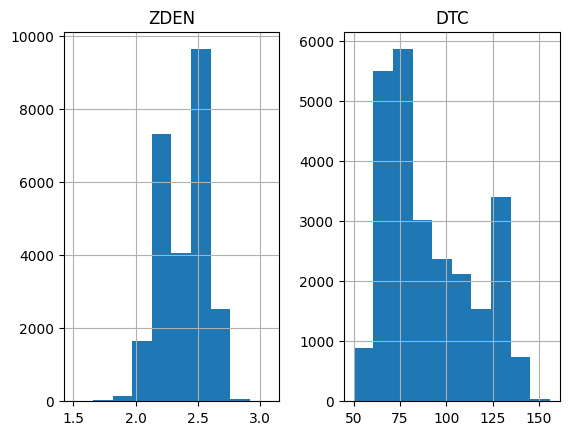

In [ ]:
two2_hist = two2.hist()

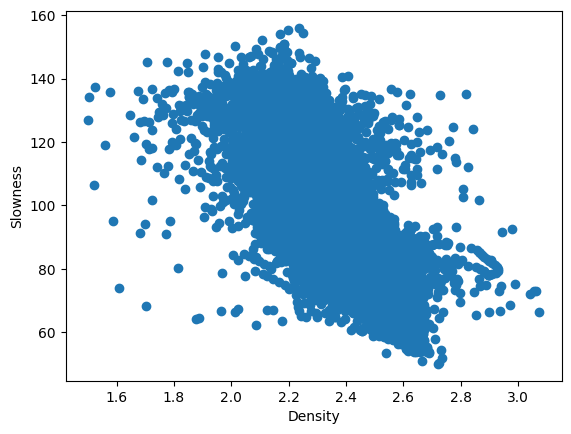

In [ ]:
plt.scatter(two2.ZDEN, two2.DTC)
plt.xlabel('Density')
plt.ylabel('Slowness')
plt.show()

The dependence is complex, but we can observe a general trend of slowness decreasing with density. Next, we will approximate this dependence with a straight line using *linear regression*, a classic statistical tool.

How do we know if our model works? We can divide the data into two parts: training and testing. We can then use the training part to fit the model and the testing part to validate the result. We will select 80% of the data for training and the remaining 20% for validation.

In [ ]:
# divide into training and testing
select = np.random.rand(len(two2)) < 0.8
train = two2[select]
test = two2[~select]

train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20483 entries, 573 to 30141
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   ZDEN    20483 non-null  float64
 1   DTC     20483 non-null  float64
dtypes: float64(2)
memory usage: 480.1 KB


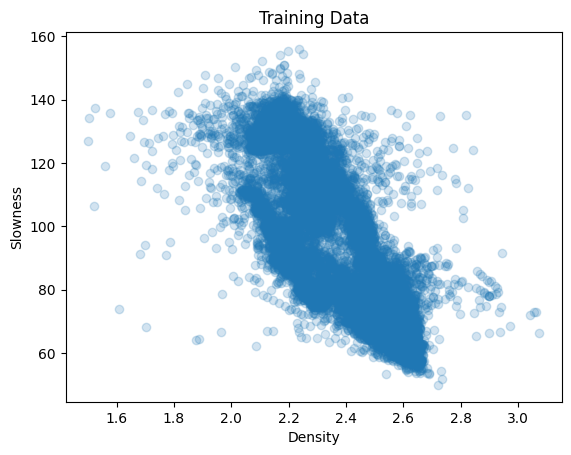

In [ ]:
plt.scatter(train.ZDEN, train.DTC, alpha=0.2)
plt.title('Training Data')
plt.xlabel('Density')
plt.ylabel('Slowness')
plt.show()

## Linear regression

Among other models, linear regression is provided by [scikit-learn](https://scikit-learn.org/), a package for classic machine learning algorithms.

![](https://upload.wikimedia.org/wikipedia/commons/thumb/0/05/Scikit_learn_logo_small.svg/320px-Scikit_learn_logo_small.svg.png)

In [ ]:
# create model
from sklearn import linear_model
model = linear_model.LinearRegression()

# train model
model.fit(train[['ZDEN']], train['DTC'])

LinearRegression()

Our first model has only two parameters: the intercept $a$ and the slope $b$ in the equation
$$s(\rho)=a+b\,\rho\;.$$
Fitting the model means estimating these parameters from the data.

In [ ]:
# regression coefficients
print('Intercept: ', model.intercept_)
print('Coefficients: ', model.coef_)

Intercept:  342.714712783924
Coefficients:  [-105.33301612]


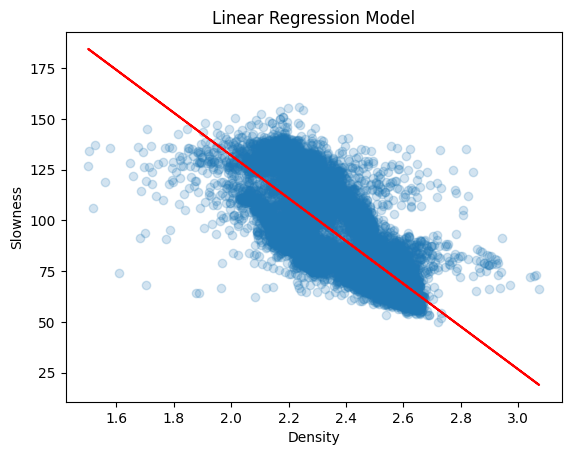

In [ ]:
plt.scatter(train.ZDEN, train.DTC, alpha=0.2)
plt.plot(train.ZDEN, model.intercept_ +
        train.ZDEN * model.coef_[0], '-r')
plt.title('Linear Regression Model')
plt.xlabel('Density')
plt.ylabel('Slowness')
plt.show()

Now, we can turn to the testing data and see how well our model predicts it.

There are different ways to measure the error. If $p_n$ are predicted values and $v_n$ are actual values, the classic linear regression uses the least-squares misfit

$\displaystyle \sum_{n=1}^{N} (p_n - v_n)^2\;.$

The root-mean-square error is defined as

$\displaystyle  \sqrt{\frac{1}{N} \sum_{n=1}^{N} (p_n - v_n)^2}\;.$

In [ ]:
# evaluate prediction error
from sklearn.metrics import mean_squared_error

want = test['DTC']
get = model.predict(test[['ZDEN']])

print("RMS error: %.3f" % np.sqrt(np.mean((get - want)**2)))
print("RMS error: %.3f" % mean_squared_error(get, want,
                                             squared=False))

RMS error: 14.584
RMS error: 14.584


In [ ]:
mean_squared_error?

## How does it work?

The model parameters are estimated by minimizing the desired objective function. In the case of linear regression, the dependence on parameters is quadratic, and the minimum is found analytically. In the more general case, the minimization is achieved by some form of gradient descent.

In [ ]:
def least_squares(a, b):
    d = train['ZDEN']
    s = train['DTC']
    return mean_squared_error(a+b*d, s, squared=False)


a, b = np.meshgrid(
    np.linspace(start=-400, stop=1000, num=101),
    np.linspace(start=-400, stop=200, num=101))
error = np.vectorize(least_squares)(a, b)

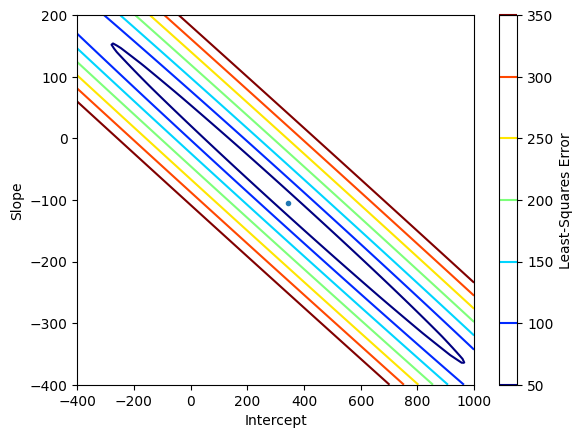

In [ ]:
# plot surface
plt.contour(a, b, error, [50, 100, 150, 200, 250, 300, 350], cmap='jet')
plt.plot(model.intercept_, model.coef_[0], marker='.')
plt.xlabel('Intercept')
plt.ylabel('Slope')
plt.colorbar(label='Least-Squares Error')
plt.show()

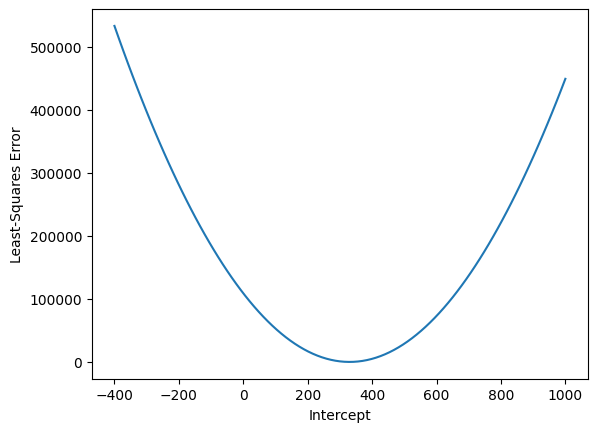

In [ ]:
a = np.linspace(start=-400, stop=1000, num=101)
error = np.vectorize(least_squares)(a, -100)**2
plt.plot(a, error)
plt.xlabel('Intercept')
plt.ylabel('Least-Squares Error')
plt.show()

## How can we improve it?

One approach to complicate the dependence would be to extend the model, for example, from a line to a parabola.

In [ ]:
# extend the model with density raised to degree 2
train = train.assign(ZDEN2=np.power(train.ZDEN, 2))
train.describe()

,ZDEN,DTC,ZDEN2
count,20483.000000,20483.000000,20483.000000
mean,2.390559,90.909945,5.748051
std,0.182431,23.996489,0.862257
min,1.501600,49.970500,2.254803
25%,2.223100,71.080400,4.942174
50%,2.431700,83.458400,5.913165
75%,2.554600,109.927300,6.525981
max,3.073500,155.980300,9.446402


In [ ]:
# create model
model2 = linear_model.LinearRegression()

# train model
model2.fit(train[['ZDEN', 'ZDEN2']], train['DTC'])

LinearRegression()

In [ ]:
# regression coefficients
print('Intercept: ', model2.intercept_)
print('Coefficients: ', model2.coef_)

Intercept:  180.87852066491058
Coefficients:  [ 32.58753742 -29.20485676]


The model changes from
$$s(\rho) = a + b\,\rho$$
to
$$s(\rho) = a + b_1\,\rho + b_2\,\rho^2$$

and involves three parameters ($a,b_1,b_2$) instead of two ($a,b$) as in the previous case.

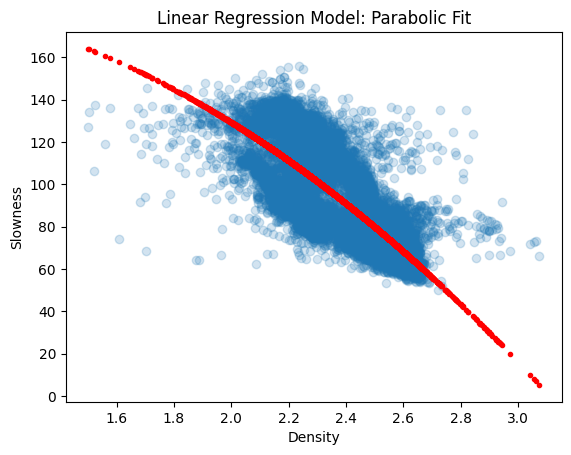

In [ ]:
plt.scatter(train.ZDEN, train.DTC, alpha=0.2)
parabola = model2.intercept_ + \
      train.ZDEN  * model2.coef_[0] + \
      train.ZDEN2 * model2.coef_[1]
plt.plot(train.ZDEN, parabola, '.r')
plt.title('Linear Regression Model: Parabolic Fit')
plt.xlabel('Density')
plt.ylabel('Slowness')
plt.show()

In [ ]:
test = test.assign(ZDEN2=np.power(test.ZDEN, 2))

want = test['DTC']
get2 = model2.predict(test[['ZDEN', 'ZDEN2']])

print("RMS error: %.3f" % mean_squared_error(get2, want,
                                             squared=False))

RMS error: 14.540


## <span style="color:red">Task 1</span>

Can you improve the fit further by using a higher-degree polynomial?

$$s(\rho) = a_0 + b_1\,\rho + b_2\,\rho^2 + b_3\,\rho^3 + \cdots + b_N\,\rho^N$$

Choose $N \ge 3$ and add code to try it out.

In [ ]:
# extend the model with density raised to degree 3
train = train.assign(ZDEN3=np.power(train.ZDEN, 3))
train.describe()

,ZDEN,DTC,ZDEN2,ZDEN3
count,20483.000000,20483.000000,20483.000000,20483.000000
mean,2.390559,90.909945,5.748051,13.898216
std,0.182431,23.996489,0.862257,3.074248
min,1.501600,49.970500,2.254803,3.385812
25%,2.223100,71.080400,4.942174,10.986946
50%,2.431700,83.458400,5.913165,14.379043
75%,2.554600,109.927300,6.525981,16.671271
max,3.073500,155.980300,9.446402,29.033517


In [ ]:
# create model
model3= linear_model.LinearRegression()

# train model
model3.fit(train[['ZDEN', 'ZDEN2', 'ZDEN3']], train['DTC'])

LinearRegression()

In [ ]:
# regression cofficients
print('Intercept:', model3.intercept_)
print('Coefficients:', model3.coef_)

Intercept: -2463.4976596622123
Coefficients: [ 3512.61375586 -1547.87211875   219.77967559]


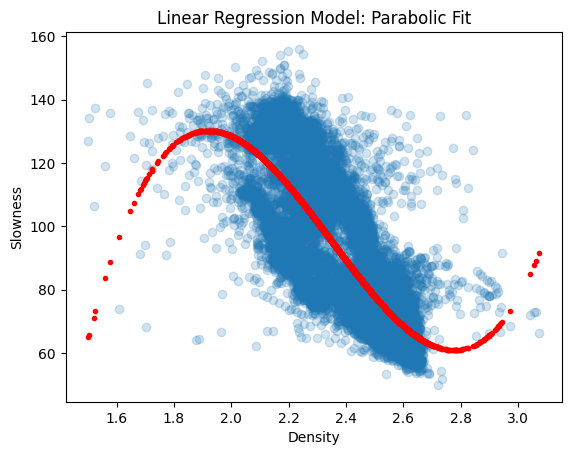

In [ ]:
plt.scatter(train.ZDEN, train.DTC, alpha=0.2)
parabola = model3.intercept_ + \
      train.ZDEN  * model3.coef_[0] + \
      train.ZDEN2 * model3.coef_[1] + \
      train.ZDEN3 * model3.coef_[2]
plt.plot(train.ZDEN, parabola, '.r')
plt.title('Linear Regression Model: Parabolic Fit')
plt.xlabel('Density')
plt.ylabel('Slowness')
plt.show()

In [ ]:
test = test.assign(ZDEN3=np.power(test.ZDEN, 3))

want = test['DTC']
get2 = model3.predict(test[['ZDEN', 'ZDEN2', 'ZDEN3']])

print("RMS error: %.3f" % mean_squared_error(get2, want,
                                             squared=False))

RMS error: 14.127


## More inputs

Another way to extend the model is to involve other logs.

Let us try the Gamma-ray log in addition to the density log.

In [ ]:
# select three logs
three = logs.loc[:, ['ZDEN', 'GR', 'DTC']]
# replace -999 with NaN
three.replace(-999, np.nan, inplace=True)
# drop rows with NaN
three.dropna(inplace=True)
# data information
three.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 25473 entries, 573 to 30142
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   ZDEN    25473 non-null  float64
 1   GR      25473 non-null  float64
 2   DTC     25473 non-null  float64
dtypes: float64(3)
memory usage: 796.0 KB


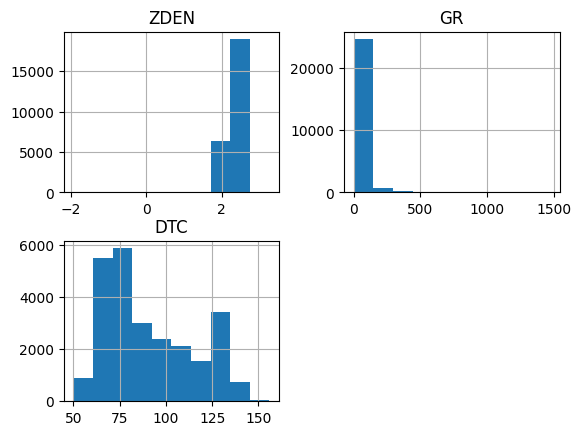

In [ ]:
three_hist = three.hist()

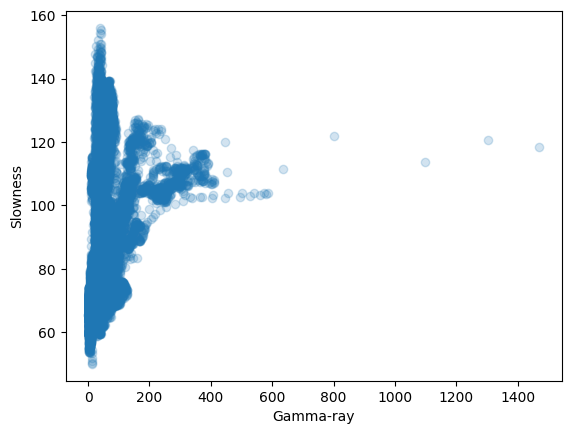

In [ ]:
# display scatter plot

import matplotlib.pyplot as plt
plt.scatter(three.GR, three.DTC, alpha=0.2)
plt.xlabel('Gamma-ray')
plt.ylabel('Slowness')
plt.show()

In [ ]:
# remove anomalous density values and anomalous gamma-ray values
three2=three.loc[(three.ZDEN > 1.5) & (three.ZDEN < 3.1) &
                 (three.GR < 400)]
three2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 25372 entries, 573 to 30142
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   ZDEN    25372 non-null  float64
 1   GR      25372 non-null  float64
 2   DTC     25372 non-null  float64
dtypes: float64(3)
memory usage: 792.9 KB


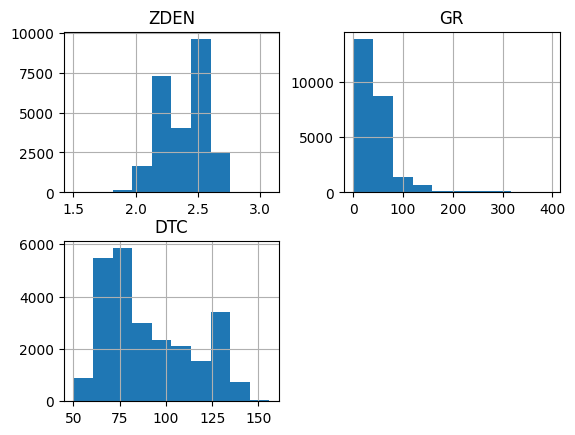

In [ ]:
three2_hist = three2.hist()

In [ ]:
# divide into training and testing
select3 = np.random.rand(len(three2)) < 0.8
train3 = three2[select3]
test3 = three2[~select3]

train3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20273 entries, 573 to 30142
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   ZDEN    20273 non-null  float64
 1   GR      20273 non-null  float64
 2   DTC     20273 non-null  float64
dtypes: float64(3)
memory usage: 633.5 KB


In [ ]:
# create model
model3 = linear_model.LinearRegression()

# train model
model3.fit(train3[['ZDEN', 'GR']], train3['DTC'])

LinearRegression()

In [ ]:
# regression coefficients
print('Intercept: ', model3.intercept_)
print('Coefficients: ', model3.coef_)

Intercept:  320.6969049928906
Coefficients:  [-98.55862903   0.12355857]


The model changes from
$$s(\rho) = a + b\,\rho$$
to
$$s(\rho,\gamma) = a + b\,\rho + c\,\gamma$$

and also involves three parameters ($a,b,c$) instead of two ($a,b$).

It represents a plane in the three-dimensional space instead of a line in the two-dimensional space.

In [ ]:
want3 = test3['DTC']
get3 = model3.predict(test3[['ZDEN', 'GR']])

print("RMS error: %.3f" % mean_squared_error(get3, want3,
                                             squared=False))

RMS error: 13.207


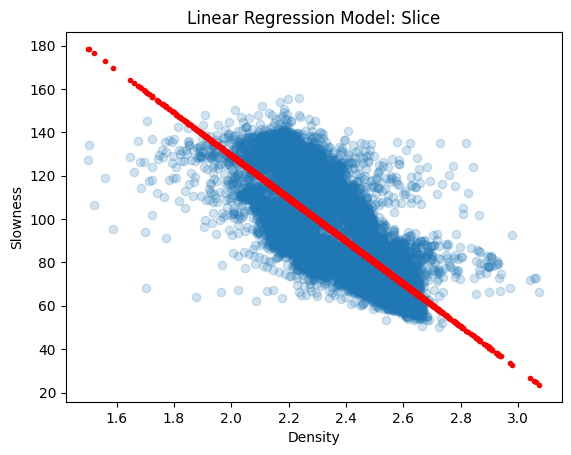

In [ ]:
plt.scatter(train3.ZDEN, train3.DTC, alpha=0.2)
plt.plot(train3.ZDEN, model3.intercept_ +
         train3.ZDEN * model3.coef_[0] +
         np.mean(train3.GR) * model3.coef_[1], '.r')
plt.title('Linear Regression Model: Slice')
plt.xlabel('Density')
plt.ylabel('Slowness')
plt.show()

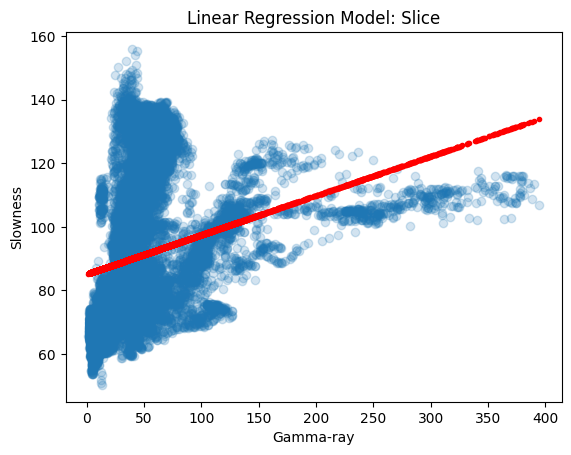

In [ ]:
plt.scatter(train3.GR, train3.DTC, alpha=0.2)
plt.plot(train3.GR, model3.intercept_ +
         np.mean(train3.ZDEN) * model3.coef_[0] +
         train3.GR * model3.coef_[1], '.r')
plt.title('Linear Regression Model: Slice')
plt.xlabel('Gamma-ray')
plt.ylabel('Slowness')
plt.show()

In [ ]:
D = np.linspace(np.min(train3.ZDEN), np.max(train3.ZDEN), 10)
G = np.linspace(np.min(train3.GR), np.max(train3.GR), 10)
D, G = np.meshgrid(D, G)
S = model3.intercept_ + D * model3.coef_[0] + G * model3.coef_[1]

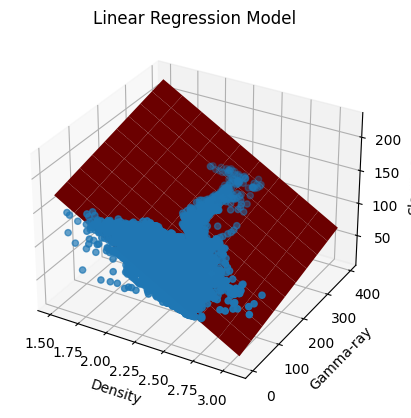

In [ ]:
axes = plt.axes(projection='3d')
axes.scatter(train3.ZDEN, train3.GR, train3.DTC)
axes.plot_surface(D, G, S, color='red')
plt.title('Linear Regression Model')
axes.set_xlabel('Density')
axes.set_ylabel('Gamma-ray')
axes.set_zlabel('Slowness')
plt.show()

## <span style="color:red">Task 2</span>

Can you improve the fit further by using more logs for prediction in addition to density and gamma-ray?

$$s(l_1,l_2,\cdots,l_N) = a_0 + b_1\,l_1 + b_2\,l_2  + \cdots + b_N\,l_N$$

Choose $N \ge 3$ and add code to try it out.

The suitable logs are neutron, gamma ray, deep resistance, medium resistance, photo-electric factor, and density.

In [ ]:
# select four logs
four = logs.loc[:, ['ZDEN', 'GR', 'DTC', 'DTS']]
#replace -999 with NaN
four.replace(-999, np.nan, inplace = True)
# drop rows with NaN
four.dropna(inplace = True)
# add data information
four.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 20688 entries, 573 to 30142
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   ZDEN    20688 non-null  float64
 1   GR      20688 non-null  float64
 2   DTC     20688 non-null  float64
 3   DTS     20688 non-null  float64
dtypes: float64(4)
memory usage: 808.1 KB


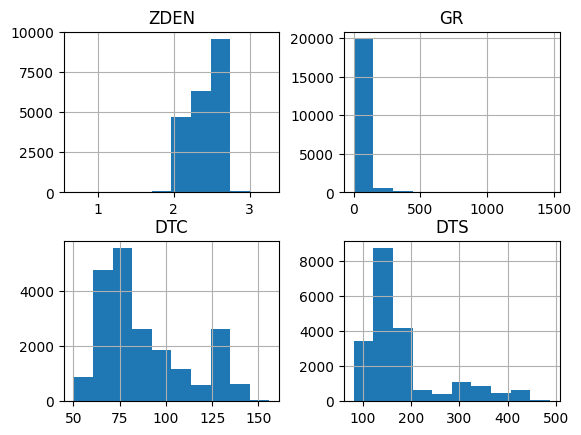

In [ ]:
four_hist = four.hist()

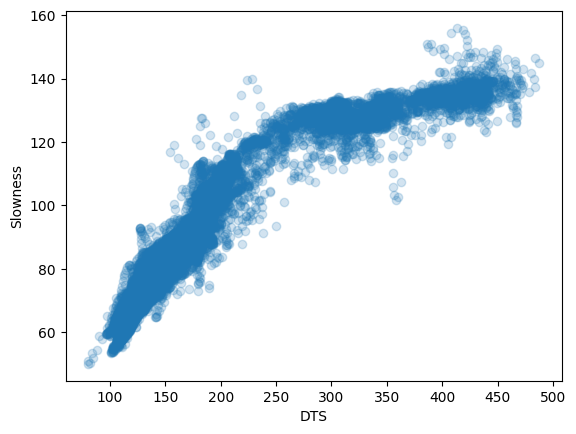

In [ ]:
# display scatter plot

plt.scatter(four.DTS, four.DTC, alpha=0.2)
plt.xlabel('DTS')
plt.ylabel('Slowness')
plt.show()


In [ ]:
# remove anomalous density values and anomalous gamma-ray values
four2=four.loc[(four.ZDEN > 1.5) & (four.ZDEN < 3.1) &
                 (four.GR < 400) & (four.DTS <470) & (four.DTS >98)]
four2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20612 entries, 573 to 30142
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   ZDEN    20612 non-null  float64
 1   GR      20612 non-null  float64
 2   DTC     20612 non-null  float64
 3   DTS     20612 non-null  float64
dtypes: float64(4)
memory usage: 805.2 KB


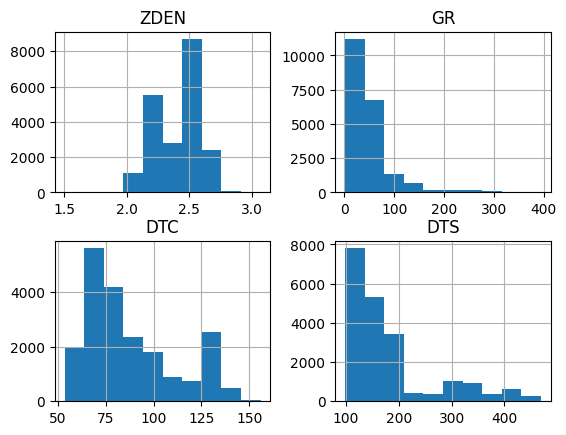

In [ ]:
four2_hist = four2.hist()

In [ ]:
# divide into training and testing
select4 = np.random.rand(len(four2)) < 0.8
train4 = four2[select4]
test4 = four2[~select4]

train4.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16355 entries, 573 to 30142
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   ZDEN    16355 non-null  float64
 1   GR      16355 non-null  float64
 2   DTC     16355 non-null  float64
 3   DTS     16355 non-null  float64
dtypes: float64(4)
memory usage: 638.9 KB


In [ ]:
# create model
model5 = linear_model.LinearRegression()

# train model
model5.fit(train4[['ZDEN', 'GR', 'DTS']], train4['DTC'])

LinearRegression()

In [ ]:
# regression coefficients
print('Intercept: ', model5.intercept_)
print('Coefficients: ', model5.coef_)

Intercept:  138.43126649499652
Coefficients:  [-37.11614668   0.08393886   0.19353905]


In [ ]:
want4 = test4['DTC']
get4 = model5.predict(test4[['ZDEN', 'GR', 'DTS']])

print("RMS error: %.3f" % mean_squared_error(get4, want4,
                                             squared=False))

RMS error: 4.891


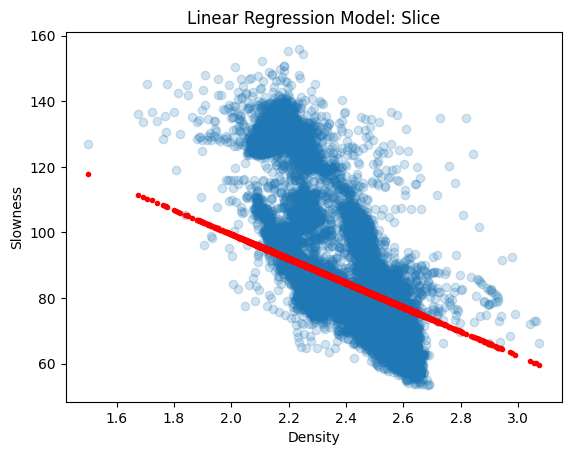

In [ ]:
plt.scatter(train4.ZDEN, train4.DTC, alpha=0.2)
plt.plot(train4.ZDEN, model5.intercept_ +
         train4.ZDEN * model5.coef_[0] +
         np.mean(train4.DTS) * model5.coef_[2], '.r')
plt.title('Linear Regression Model: Slice')
plt.xlabel('Density')
plt.ylabel('Slowness')
plt.show()

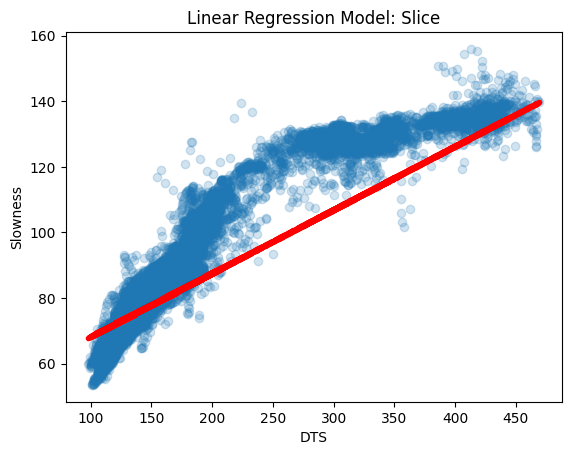

In [ ]:
plt.scatter(train4.DTS, train4.DTC, alpha=0.2)
plt.plot(train4.DTS, model5.intercept_ +
         np.mean(train4.ZDEN) * model5.coef_[0] +
         train4.DTS * model5.coef_[2], '.r')
plt.title('Linear Regression Model: Slice')
plt.xlabel('DTS')
plt.ylabel('Slowness')
plt.show()

## Conclusions

Simple linear regression is too primitive to be of much practical use in this case.

However, it illustrates the general principles of supervised learning:

1. Our goal is to predict one part of the data from the other parts.
2. To make a prediction, we build a model which depends on parameters.
3. The parameters are estimated from training data by minimizing an objection function, which measures the prediction error.
4. Minimization generally involves a form of gradient descent (*analytical in the case of linear regression*.)
5. We can set aside part of the available data and use it for validation.
6. There are uncertainties in the parameter estimation and the model prediction.

## <span style="color:red">Bonus Task 3</span>

Continue using the Linear Regression approach but try to improve the results by non-linear transformations of the dependent variables. The task is open-ended, but here are some possibilities to explore:

* Try predicting velocity (1/slowness) instead of slowness.

* [Gardner's equation](https://wiki.seg.org/wiki/Dictionary:Gardner%E2%80%99s_equation) suggests an empirical relationship between density and velocity of the form
$$\rho = \alpha\,v^{\beta}\;,$$
where the parameters $\alpha$ and $\beta$ depend on lithology.<br>Taking the logarithm of both sides,
<br><br>
$$\log \rho = \log{\alpha} + \beta\,\log{v}\ = \log{\alpha} - \beta\,\log{s}\;.$$
This relationship suggests switching to logarithms in the linear regression model.

* Try other non-linear functions of logs in addition to multiple logs as independent variables in linear regression.